In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Search for the PCB image file among possible extensions
candidates = ['pcb.tiff', 'pcb.tif', 'pcb.png']
file_path = next((p for p in candidates if os.path.exists(p)), None)
if file_path is None:
    raise FileNotFoundError(f"PCB image not found in paths: {candidates}")

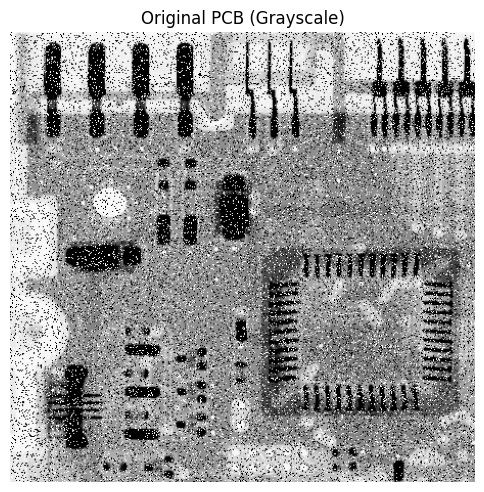

In [5]:
# 1. Load the original image in grayscale
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Display the original grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title('Original PCB (Grayscale)')
plt.axis('off')
plt.show()

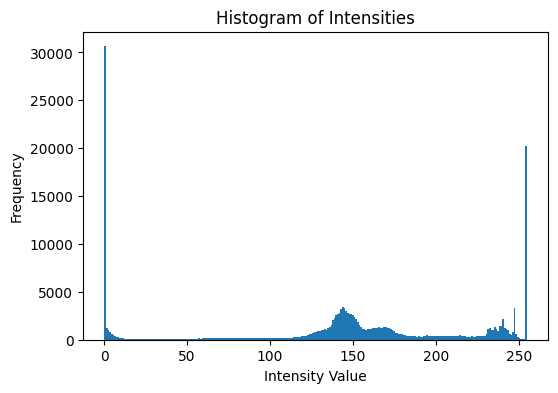

In [6]:
# 2. Plot the histogram of pixel intensities
plt.figure(figsize=(6, 4))
plt.hist(img.ravel(), bins=256)
plt.title('Histogram of Intensities')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

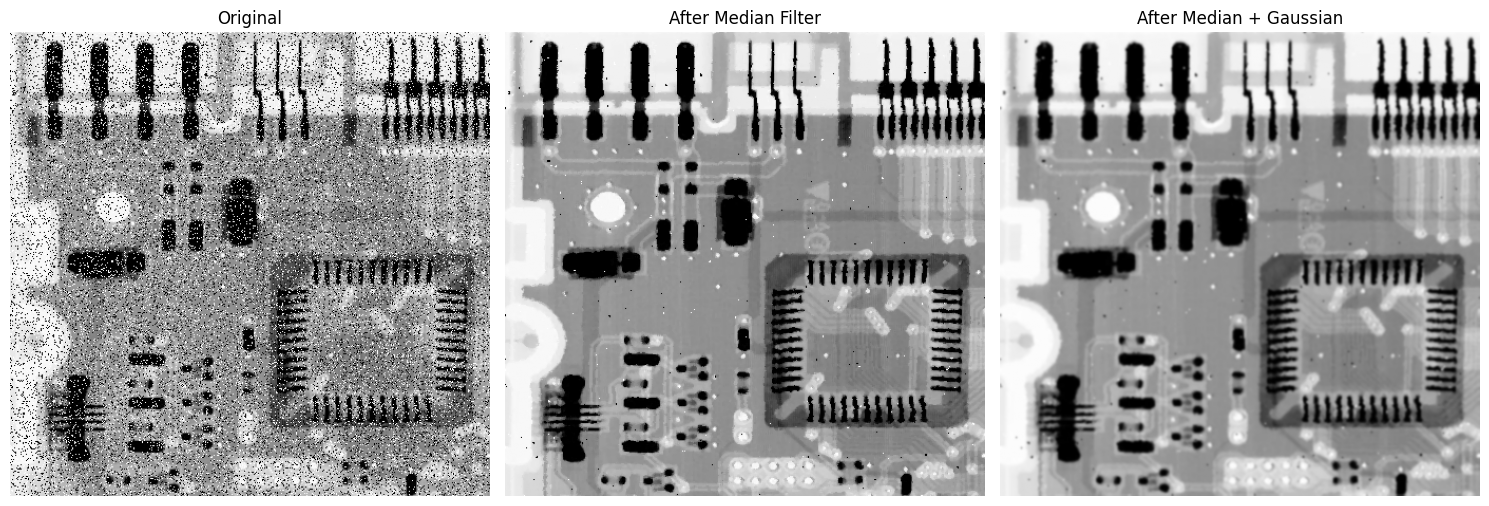

In [7]:
# 3. Noise filtering steps
# 3.1 Apply a median filter to remove salt-and-pepper noise
med = cv2.medianBlur(img, 3)

# 3.2 Apply a light Gaussian blur to smooth remaining artifacts
filtered = cv2.GaussianBlur(med, (5, 5), sigmaX=1.0)

# Display the results side by side: original, after median, after median+Gaussian
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(med, cmap='gray')
ax2.set_title('After Median Filter')
ax2.axis('off')

ax3.imshow(filtered, cmap='gray')
ax3.set_title('After Median + Gaussian')
ax3.axis('off')

plt.tight_layout()
plt.show()